In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
health = pd.read_excel("C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/BRICS_World_Bank_Indicators/BRICS_Health_and_Poverty_Data.xlsx")

In [5]:
top10depart_RF_1995_2018 = pd.read_csv("C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/top10depart_RF_1995_2018.csv") 

In [6]:
top10depart_RF_1995_2018 = top10depart_RF_1995_2018.set_index('Unnamed: 0')

In [7]:
top10depart_RF_1995_2018.index.names = [None]

In [8]:
h = health.copy()

In [9]:
h = h.rename(columns={"Country Name": "Country_Name","Country Code": "Country_Code", "Series Name": "Series_Name", "Series Code": "Series_Code"})

In [10]:
h.columns = h.columns.str.replace(' \[YR\d+\]', '', regex=True)

In [11]:
h_RF = h.loc[h["Country_Name"] == "Russian Federation", :]

In [12]:
h_RF_1995_2018 = h_RF.drop(h_RF.loc[:,'1970':'1994'].columns, axis=1)

In [13]:
h_RF_1995_2018=h_RF_1995_2018.drop(['Country_Code','Series_Code'], axis=1) 

In [14]:
result = pd.concat([top10depart_RF_1995_2018, h_RF_1995_2018], axis=0)

In [15]:
result_melt = result.melt(id_vars=['Country_Name','Series_Name'], value_vars=['1995','1996','1997','1998','1999','2000','2001'
                                                                              ,'2002','2003','2004','2005','2006','2007','2008'
                                                                              ,'2009','2010','2011','2012','2013','2014','2015'
                                                                              ,'2016','2017','2018','2019','2020'], ignore_index=False) #or transpose

In [16]:
result_transpose = result.T

In [17]:
df=result_transpose.copy()

In [18]:
df.columns = df.columns.astype(str)

In [19]:
df = df.rename(columns={'4': 'dep4'})

In [20]:
df = df.drop(['Country_Name','Series_Name','2020'])

In [21]:
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

In [22]:
df.corrwith(df["dep4"],axis=0).sort_values()

1079   -0.936391
943    -0.925616
1047   -0.925376
879    -0.924744
1043   -0.924181
990    -0.920903
989    -0.919683
912    -0.918196
1035   -0.916694
1045   -0.914516
1048   -0.912064
1042   -0.905320
909    -0.904848
1046   -0.903753
948    -0.895078
1008   -0.893791
913    -0.891202
929    -0.890694
1080   -0.890195
933    -0.890145
931    -0.889821
927    -0.889519
932    -0.887473
928    -0.887443
1072   -0.886536
1039   -0.883857
1007   -0.883552
930    -0.874733
1086   -0.873116
1088   -0.872277
944    -0.870854
1070   -0.870774
881    -0.865231
1087   -0.862859
1071   -0.859286
1041   -0.857890
916    -0.853260
921    -0.849451
923    -0.848116
1073   -0.841769
915    -0.841486
1034   -0.837181
922    -0.835908
1063   -0.827185
1076   -0.826601
917    -0.826371
955    -0.818715
947    -0.818402
1038   -0.816428
946    -0.816149
845    -0.797364
949    -0.792861
1037   -0.782473
1036   -0.782161
911    -0.781095
991    -0.769342
1040   -0.765211
886    -0.764106
904    -0.7455

In [23]:
df_ind = df.reset_index()

In [24]:
result_transpose[[863, 873, 876, 958, 1033, 874]].iloc[1] # > 0.9

863     Current health expenditure per capita (current...
873     Domestic general government health expenditure...
876     Domestic private health expenditure per capita...
958     Out-of-pocket expenditure per capita (current ...
1033           Population, female (% of total population)
874     Domestic general government health expenditure...
Name: Series_Name, dtype: object

In [32]:
melt_to_plot1 = result_melt[result_melt.index.isin([863, 873, 876, 874])]

In [33]:
melt_ind1 = melt_to_plot1.reset_index()

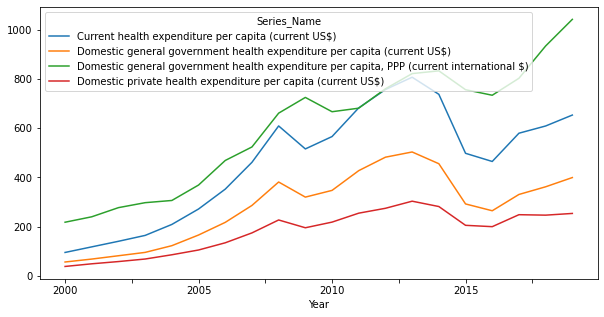

In [34]:
e_ch1 = melt_ind1.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch1.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel('Year')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.legend(fontsize=13)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/health_RF.png',dpi=200
           ,bbox_inches='tight') 

In [36]:
result_transpose[[1079,943,1047,879,1043,990,989,912,1035,1045,1048,1042,909,1046,948,1008,913,929]].iloc[1]

1079    Risk of catastrophic expenditure for surgical ...
943                     Number of deaths ages 10-14 years
1047        Prevalence of anemia among pregnant women (%)
879     External health expenditure (% of current heal...
1043    Poverty headcount ratio at national poverty li...
990     Population ages 10-14, male (% of male populat...
989     Population ages 10-14, female (% of female pop...
912     Maternal mortality ratio (modeled estimate, pe...
1035             Population, male (% of total population)
1045    Prevalence of anemia among children (% of chil...
1048    Prevalence of anemia among women of reproducti...
1042    Poverty headcount ratio at $5.50 a day (2011 P...
909                   Lifetime risk of maternal death (%)
1046    Prevalence of anemia among non-pregnant women ...
948                             Number of maternal deaths
1008    Population ages 40-44, male (% of male populat...
913     Maternal mortality ratio (national estimate, p...
929     Mortal